<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/drewalessi/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Install required libraries
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery pytest ipytest keras

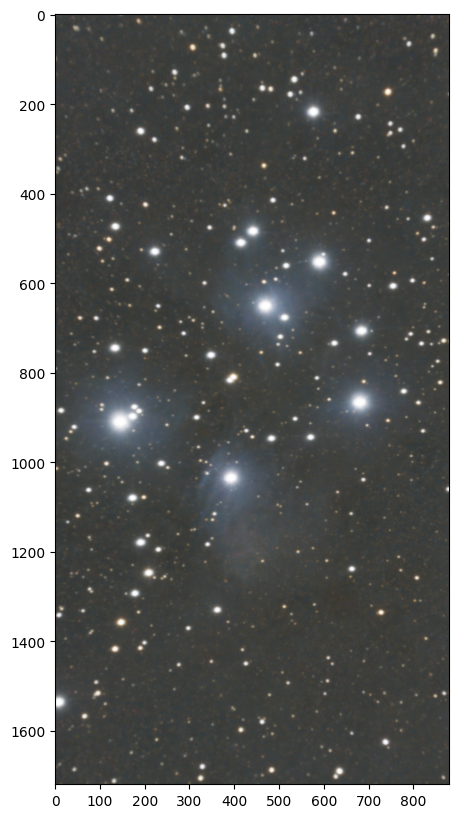

In [105]:
# Get FITS image
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/main/data/10.fits"
response = requests.get(fits_url)
response.raise_for_status()
fits_data = fits.open(BytesIO(response.content))

hdul = fits.open(BytesIO(response.content))
image_data = np.transpose(hdul[0].data, (1,2,0))
hdul.close()

fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data[100:-100,100:-100,:]))
plt.show()

In [106]:
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder

bkg_sigma = mad_std(np.mean(image_data, axis=2))

daofind = DAOStarFinder(fwhm=3.0, threshold=10 * bkg_sigma, min_separation = 15)
sources = daofind(np.mean(image_data, axis=2))

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(100)

catalog

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,-7.034564
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,-7.309025
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,-7.205584
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,-7.398557
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,-7.388074
...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,-3.641843
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,-3.522637
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,-3.975800
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,-3.885711


In [107]:
wcs = WCS(hdul[0].header, naxis=2)
print(wcs)
sky_coords = wcs.all_pix2world(catalog['xcentroid'], catalog['ycentroid'],1)
catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 56.389723256 24.2242771937 
CRPIX : 634.679489136 877.358764648 
PC1_1 PC1_2  : -0.997660176468955 0.0679625865705261 
PC2_1 PC2_2  : -0.068382858067761 -0.997686858683496 
CDELT : 0.00110880075136929 0.0011085585131786 
NAXIS : 1080  1920  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,-7.034564,56.829989,24.107119
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,-7.309025,56.451742,24.368905
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,-7.205584,56.234864,24.114624
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,-7.398557,56.311010,24.468492
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,-7.388074,56.566050,23.949755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,-3.641843,56.577133,24.571678
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,-3.522637,56.584506,23.324951
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,-3.975800,56.520498,24.063469
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,-3.885711,56.432228,24.221607


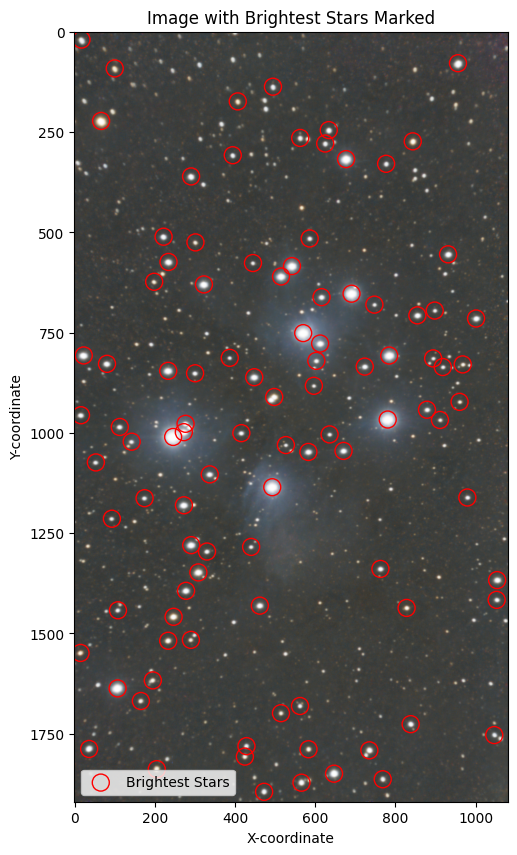

In [108]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data))

#Add scatter plot
plt.scatter(catalog['xcentroid'], catalog['ycentroid'], color='red', marker='o', facecolor='none', s=150, label='Brightest Stars')

#Add labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Image with Brightest Stars Marked')
plt.legend()

#Show the plot
plt.show()

In [109]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

options = Simbad.list_votable_fields()

In [110]:
import astropy.units as u
Simbad.ROW_LIMIT = 1
Simbad.reset_votable_fields()
Simbad.add_votable_fields("mesdistance", "V", "sp", "otype", "ids")

for idx, row in tqdm(catalog.iterrows(), total=catalog.shape[0]):
  ra, dec = row["ra"], row["dec"]
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
  try:
    result = Simbad.query_region(coord, radius="50s") #adjust radius to find useful search area
    s = result[0]
    if result:
      catalog.at[idx, "star_name"] = s["main_id"]
      catalog.at[idx, "spectral_type"] = s["sp_type"]
      catalog.at[idx, "object_type"] = s["otype"]
      catalog.at[idx, "visual_mag"] = s["V"]
      dist = s["mesdistance.dist"]
      catalog.at[idx, "simbad_distance_pc"] = float(dist) if dist is not None else None
      catalog.at[idx, "simbad_distance_ly"] = float(dist) * 3.26156 if dist is not None else None

  except Exception as e:
      print(f"Error querying Simbad for {idx}: {e}")

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pandas/core/internals/base.py:363: UserWarning: Warning: converting a masked element to nan.
  arr[indexer] = value
<ipython-input-110-b22d46236918>:18: UserWarning: Warning: converting a masked element to nan.
  catalog.at[idx, "simbad_distance_pc"] = float(dist) if dist is not None else None
<ipython-input-110-b22d46236918>:19: UserWarning: Warning: converting a masked element to nan.
  catalog.at[idx, "simbad_distance_ly"] = float(dist) * 3.26156 if dist is not None else None
100%|██████████| 100/100 [00:00<00:00, 478.86it/s]

Error querying Simbad for 299: index 0 out of range for table with length 0
Error querying Simbad for 442: index 0 out of range for table with length 0
Error querying Simbad for 126: index 0 out of range for table with length 0
Error querying Simbad for 341: index 0 out of range for table with length 0
Error querying Simbad for 29: index 0 out of range for table with length 0
Error querying Simbad for 178: index 0 out of range for table with length 0
Error querying Simbad for 207: index 0 out of range for table with length 0
Error querying Simbad for 378: index 0 out of range for table with length 0
Error querying Simbad for 107: index 0 out of range for table with length 0
Error querying Simbad for 396: index 0 out of range for table with length 0
Error querying Simbad for 374: index 0 out of range for table with length 0
Error querying Simbad for 7: index 0 out of range for table with length 0
Error querying Simbad for 102: index 0 out of range for table with length 0
Error querying 

In [111]:
catalog.to_csv('catalogForStars.csv')
catalog.head(100)

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simbad_distance_ly
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,-7.034564,56.829989,24.107119,* 24 Tau,A0V,*,6.2800,134.318,438.086216
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,-7.309025,56.451742,24.368905,* 20 Tau,B7III,PM*,3.8700,130.356,425.163915
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,-7.205584,56.234864,24.114624,Gaia DR3 65269041747317248,,*,NaN,NaN,NaN
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,-7.398557,56.311010,24.468492,UCAC4 573-008711,,*,13.5466,1023.123,3336.977052
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,-7.388074,56.566050,23.949755,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,-3.641843,56.577133,24.571678,Cl* Melotte 22 DH 439,,Er*,18.9000,139.303,454.345093
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,-3.522637,56.584506,23.324951,NaN,NaN,NaN,NaN,NaN,NaN
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,-3.975800,56.520498,24.063469,BD+23 518,GIV,*,10.6500,127.928,417.244848
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,-3.885711,56.432228,24.221607,Cl Melotte 22 761,G2V,Y*O,10.5500,132.219,431.240202


In [112]:
catalog = pd.read_csv('catalogForStars.csv', index_col=0)
catalog.head(100)

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simbad_distance_ly
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,-7.034564,56.829989,24.107119,* 24 Tau,A0V,*,6.2800,134.318,438.086216
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,-7.309025,56.451742,24.368905,* 20 Tau,B7III,PM*,3.8700,130.356,425.163915
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,-7.205584,56.234864,24.114624,Gaia DR3 65269041747317248,NaN,*,NaN,NaN,NaN
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,-7.398557,56.311010,24.468492,UCAC4 573-008711,NaN,*,13.5466,1023.123,3336.977052
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,-7.388074,56.566050,23.949755,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,-3.641843,56.577133,24.571678,Cl* Melotte 22 DH 439,NaN,Er*,18.9000,139.303,454.345093
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,-3.522637,56.584506,23.324951,NaN,NaN,NaN,NaN,NaN,NaN
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,-3.975800,56.520498,24.063469,BD+23 518,GIV,*,10.6500,127.928,417.244848
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,-3.885711,56.432228,24.221607,Cl Melotte 22 761,G2V,Y*O,10.5500,132.219,431.240202


In [113]:
catalog['spectral_type'].notna().sum() #add up non-stars

np.int64(29)

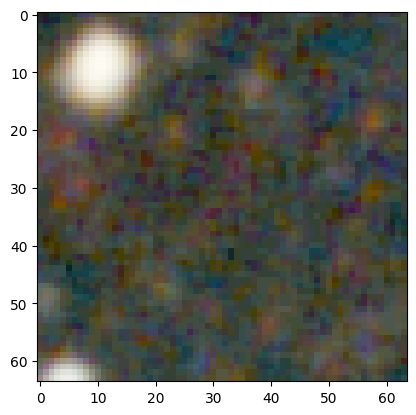

In [114]:
import matplotlib.pyplot as plt

def make_patch(image, x, y, size = 64):
  x_min = int(np.clip(x-size/2, 0, image.shape[0]))
  x_max = int(np.clip(x+size/2, 0, image.shape[0]))
  y_min = int(np.clip(y-size/2, 0, image.shape[1]))
  y_max = int(np.clip(y+size/2, 0, image.shape[1]))
  return image[x_min:x_max, y_min:y_max]

plt.imshow(apply_stretch(make_patch(image_data, catalog['xcentroid'].iloc[0], catalog['ycentroid'].iloc[0])))

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 8

model = Sequential()
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
catalog['spectral_type'].unique() #just use first letter so there are more examples of each type for training

array(['A0V', 'B7III', nan, 'B8V', 'M3Ve', 'A0Va', 'A1V', 'K2III', 'A2V',
       'A3V', 'kA6hA9mF1(IV)', 'F0V', 'G0', 'M5.5', 'F3V', 'F8.5V', 'F9V',
       'G3', 'F5V', 'F2', 'G5', 'K2', 'A2', 'F5', 'M1.1', 'F8', 'GIV',
       'G2V'], dtype=object)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def extract_spectral_class(s):
  """ simplify spectral classes, e.g. M1 --> M """
  if s is np.nan:
    return s
  return s[0]

catalog['simple_spectral_class'] = catalog['spectral_type'].apply(extract_spectral_class)
catalog.head(100)

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simbad_distance_ly,simple_spectral_class
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,-7.034564,56.829989,24.107119,* 24 Tau,A0V,*,6.2800,134.318,438.086216,A
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,-7.309025,56.451742,24.368905,* 20 Tau,B7III,PM*,3.8700,130.356,425.163915,B
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,-7.205584,56.234864,24.114624,Gaia DR3 65269041747317248,NaN,*,NaN,NaN,NaN,NaN
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,-7.398557,56.311010,24.468492,UCAC4 573-008711,NaN,*,13.5466,1023.123,3336.977052,NaN
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,-7.388074,56.566050,23.949755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,-3.641843,56.577133,24.571678,Cl* Melotte 22 DH 439,NaN,Er*,18.9000,139.303,454.345093,NaN
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,-3.522637,56.584506,23.324951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,-3.975800,56.520498,24.063469,BD+23 518,GIV,*,10.6500,127.928,417.244848,G
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,-3.885711,56.432228,24.221607,Cl Melotte 22 761,G2V,Y*O,10.5500,132.219,431.240202,G


In [118]:
le = LabelEncoder()
catalog['spectral_label'] = le.fit_transform(catalog['simple_spectral_class'])
catalog.head(100)

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,...,ra,dec,star_name,spectral_type,object_type,visual_mag,simbad_distance_pc,simbad_distance_ly,simple_spectral_class,spectral_label
255,256,245.715941,1009.948762,0.390310,-0.038394,-0.331690,25,58070.666667,1.252823e+06,-15.244724,...,56.829989,24.107119,* 24 Tau,A0V,*,6.2800,134.318,438.086216,A,0
157,158,570.009355,751.024069,0.396467,-0.054199,-0.175118,25,54932.000000,1.116112e+06,-15.119269,...,56.451742,24.368905,* 20 Tau,B7III,PM*,3.8700,130.356,425.163915,B,1
237,238,780.743165,966.492160,0.393904,-0.049542,-0.177231,25,52322.000000,1.073957e+06,-15.077467,...,56.234864,24.114624,Gaia DR3 65269041747317248,NaN,*,NaN,NaN,NaN,NaN,7
130,131,690.532879,652.720466,0.394572,-0.042526,-0.139082,25,53321.000000,1.053617e+06,-15.056707,...,56.311010,24.468492,UCAC4 573-008711,NaN,*,13.5466,1023.123,3336.977052,NaN,7
299,300,492.852649,1135.292730,0.395676,-0.091704,-0.306216,25,52639.666667,1.038990e+06,-15.041529,...,56.566050,23.949755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,444.751622,576.269041,0.424599,0.199579,0.059958,25,872.000000,1.330800e+04,-10.310282,...,56.577133,24.571678,Cl* Melotte 22 DH 439,NaN,Er*,18.9000,139.303,454.345093,NaN,7
453,454,514.551423,1698.730369,0.426178,0.046205,0.038339,25,836.333333,1.325467e+04,-10.305922,...,56.584506,23.324951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
264,265,526.868413,1030.145613,0.451109,-0.185447,-0.156590,25,986.000000,1.297400e+04,-10.282685,...,56.520498,24.063469,BD+23 518,GIV,*,10.6500,127.928,417.244848,G,3
213,214,596.597972,882.383448,0.435410,-0.269028,-0.143882,25,941.666667,1.296567e+04,-10.281987,...,56.432228,24.221607,Cl Melotte 22 761,G2V,Y*O,10.5500,132.219,431.240202,G,3


Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (54, 64, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 9, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (47, 64, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch with unexpected shape: (64, 0, 3)
Skipping patch wit

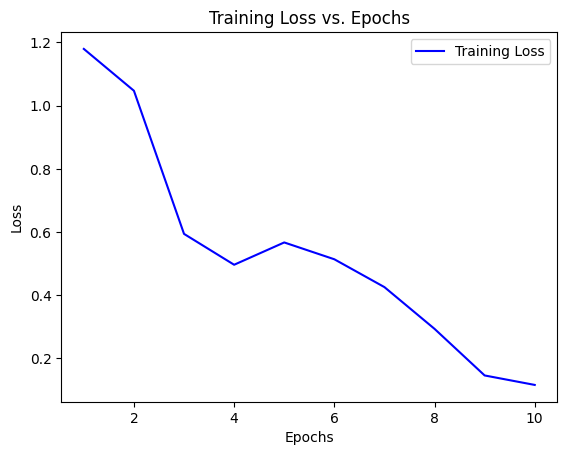

In [119]:
patches = []
labels = []
for _, row in catalog.iterrows():
  patch = make_patch(image_data, row['xcentroid'], row['ycentroid'])
  # Check if the patch has the expected shape before appending
  if patch.shape == (64, 64, 3):
    patches.append(patch)
    labels.append(row['spectral_label'])
  else:
    # Handle patches with unexpected shapes (e.g., skip, resize, or pad)
    print(f"Skipping patch with unexpected shape: {patch.shape}")
X = np.array(patches)[..., np.newaxis]
y = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

#plot loss curve
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

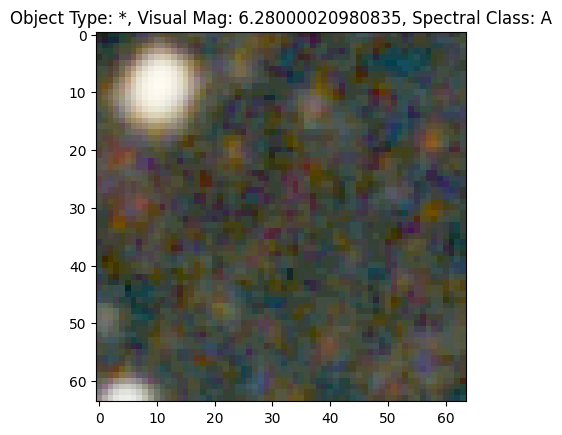

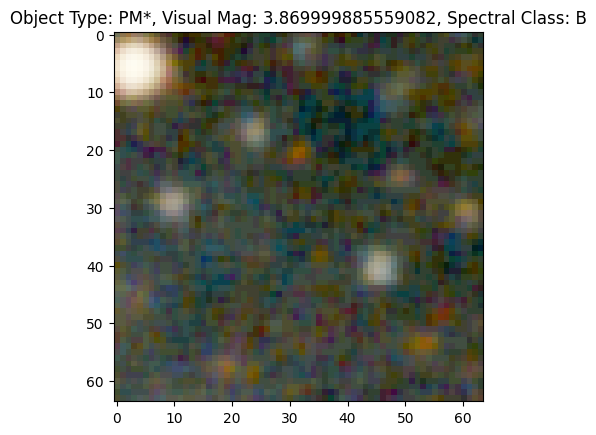

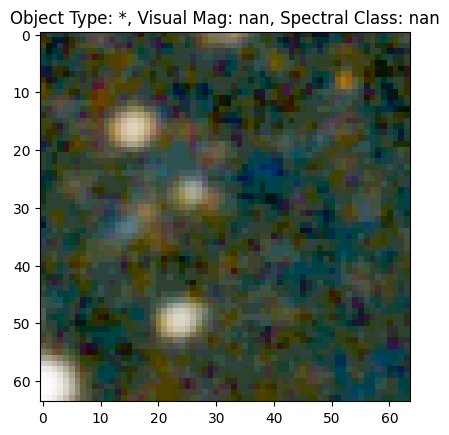

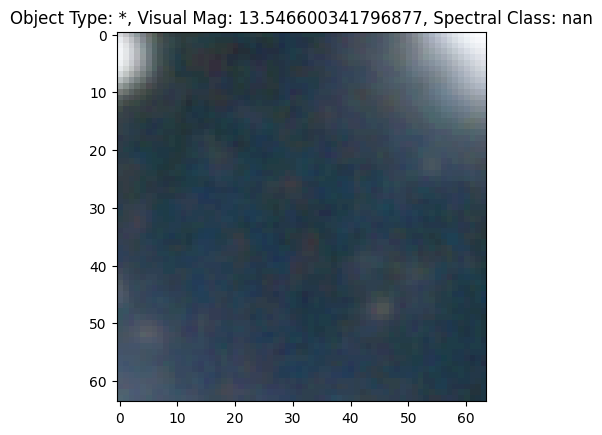

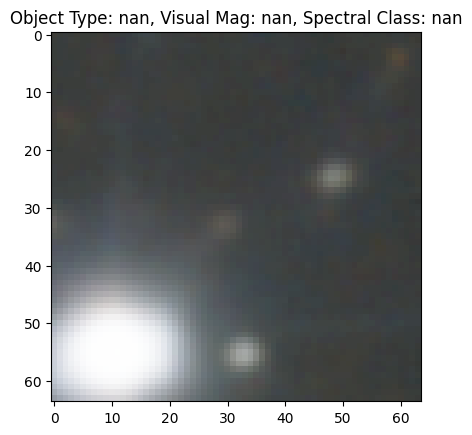

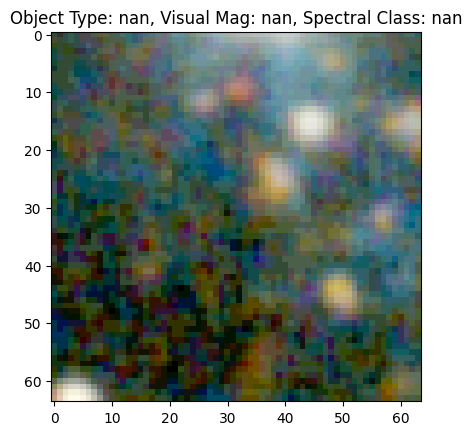

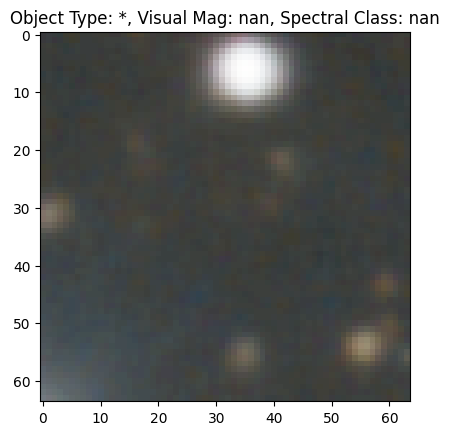

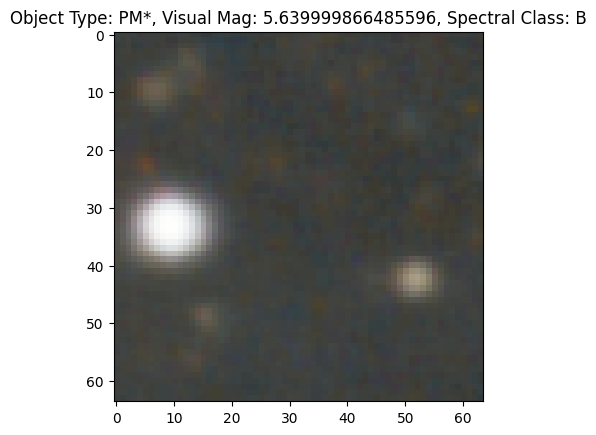

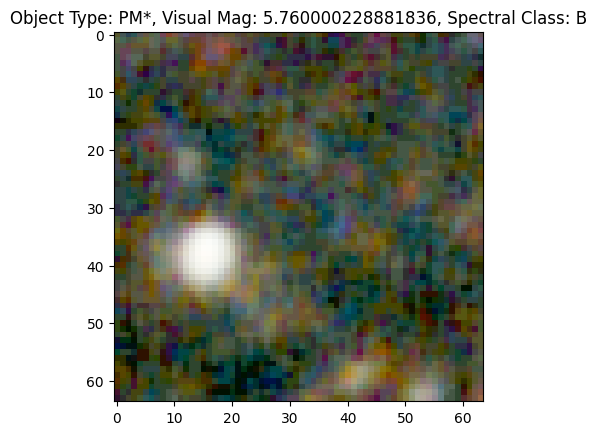

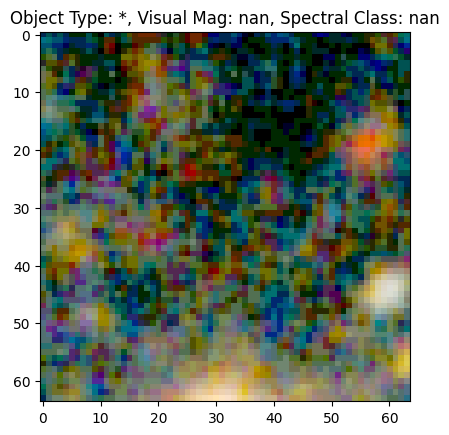

In [120]:
# Display patches with label including morphology, brightness, and spectral class
import matplotlib.pyplot as plt

for i in range(min(10, len(patches))): #Limit to display only the top ten
  plt.figure()
  plt.imshow(apply_stretch(patches[i]))
  label = f"Object Type: {catalog['object_type'].iloc[i]}, Visual Mag: {catalog['visual_mag'].iloc[i]}, Spectral Class: {catalog['simple_spectral_class'].iloc[i]}"
  plt.title(label)
  plt.show()
